In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")
df=pd.read_csv('../cleaned/CampaignPerformance.csv')
df

,dates,campaign_name,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name
0,2024-04-29,USP_Search_APTNTSKA_250124,--,6766.15,1250,220,0.176000,25.0,google,gmat/gre
1,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,#7 ( Graphic ) - Get A Free Pass,946.38,3154,9,0.285352,1.0,facebook,usp-2_ka_tn_050424
2,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,USP_S3_never-been-easier,170.40,2695,8,0.296846,0.0,facebook,usp-2_ka_tn_050424
3,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,USP_S4_Do-you-have,55.65,577,2,0.346620,0.0,facebook,usp-2_ka_tn_050424
4,2024-05-02,USP_2_Lead-gen-2_Top4-states_050424,USP_S1_We-guarantee,296.94,1466,10,0.682128,1.0,facebook,usp-2_ap_ts_050424
...,...,...,...,...,...,...,...,...,...,...
24245,2024-03-12,USP_MS + Coop Campaign_240224,USP_RG_VideoAd5,67.18,268,1,0.373134,0.0,facebook,ms + coop ka&tn ad set - 240224
24246,2024-03-12,USP_MS + Coop Campaign_240224,USP_RG_VideoAd5,50.65,75,1,1.333333,0.0,facebook,ms + coop all india ad set - 240224
24247,2024-03-12,USP Study Abroad_Generic_240224,USP_Webinar_Saturdayfuture - Copy,11.34,28,0,0.000000,0.0,facebook,ap&ts generic leads ad set_240224
24248,2024-03-12,USP Study Abroad_Generic_240224,USP_Webinar_Saturdayfuture - Copy,136.97,134,0,0.000000,0.0,facebook,ka&tn generic leads ad set_240224


In [4]:
df[df['campaign_name']=='usp_2_lead-gen-2_top4-states_050424']

,dates,campaign_name,creative_name,total_spent,impressions,clicks,click_through_rate,leads,platform,adset_name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24250 entries, 0 to 24249
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dates               24250 non-null  object 
 1   campaign_name       24250 non-null  object 
 2   creative_name       24250 non-null  object 
 3   total_spent         24250 non-null  float64
 4   impressions         24250 non-null  int64  
 5   clicks              24250 non-null  int64  
 6   click_through_rate  24250 non-null  float64
 7   leads               24250 non-null  float64
 8   platform            24250 non-null  object 
 9   adset_name          24250 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.9+ MB


Text(0.5, 1.0, 'Total Spend by Platform')

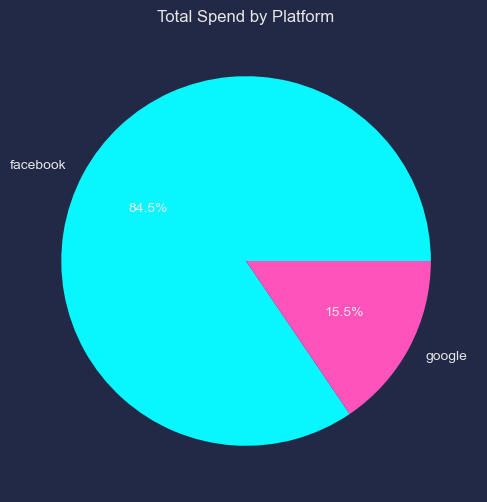

In [6]:
df_group=df[['platform','total_spent','impressions','clicks','leads']].groupby('platform').sum()
plt.figure(figsize=(10, 6))
plt.pie(df_group['total_spent'], labels=df_group.index, autopct='%1.1f%%')
plt.title('Total Spend by Platform')

In [7]:
df_group

,total_spent,impressions,clicks,leads
platform,,,,
facebook,8970978.10,43202018,270165,27536.00
google,1648768.35,8094970,165603,3630.34


Text(0.5, 1.0, 'Total leads by Platform')

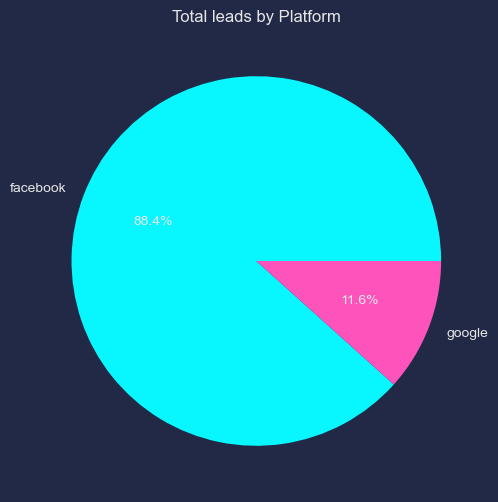

In [8]:
plt.figure(figsize=(10, 6))
plt.pie(df_group['leads'], labels=df_group.index, autopct='%1.1f%%')
plt.title('Total leads by Platform')

In [9]:
df_cp = df.groupby('campaign_name').agg({
    'platform': 'first',
    'total_spent': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'leads': 'sum'
}).reset_index()
df_cp.sort_values(by='leads',inplace=True)
df_cp.reset_index(drop=True, inplace=True)
df_cp.head(10)


,campaign_name,platform,total_spent,impressions,clicks,leads
0,USP Masterclass Cold [ 14th Dec ] - Link Click Ad,facebook,10452.55,871201,18578,0.00
1,USP_Video_ALL-India_Lead-Gen_Keywords_110324,google,25865.85,442455,10896,52.00
2,USP_Video_India_EX-APTLTSKA_Lead-Gen_160224,google,76059.42,2302262,31294,82.00
3,xCBO - USP Masterclass Cold [ 7th Dec ] - High...,facebook,13562.84,62852,644,111.00
4,USP Masterclass Cold [ 31st Oct ] - More volum...,facebook,92486.22,326809,2939,134.00
5,USP_Video_APTLTSKA_Lead-Gen_160224,google,89981.07,1546844,29492,155.98
6,USP_Program_More-volume_With-Logic_South-state...,facebook,109130.82,556972,2981,171.00
7,USP_Program_Lead-gen_4_MAR&MBA_140223,facebook,74697.63,261944,1455,173.00
8,xCBO - USP Masterclass Cold [ 23rd Nov ] - Mor...,facebook,44937.43,195004,1594,208.00
9,USP Masterclass Cold [ 23rd Nov ] - More volum...,facebook,122867.35,527530,4542,216.00


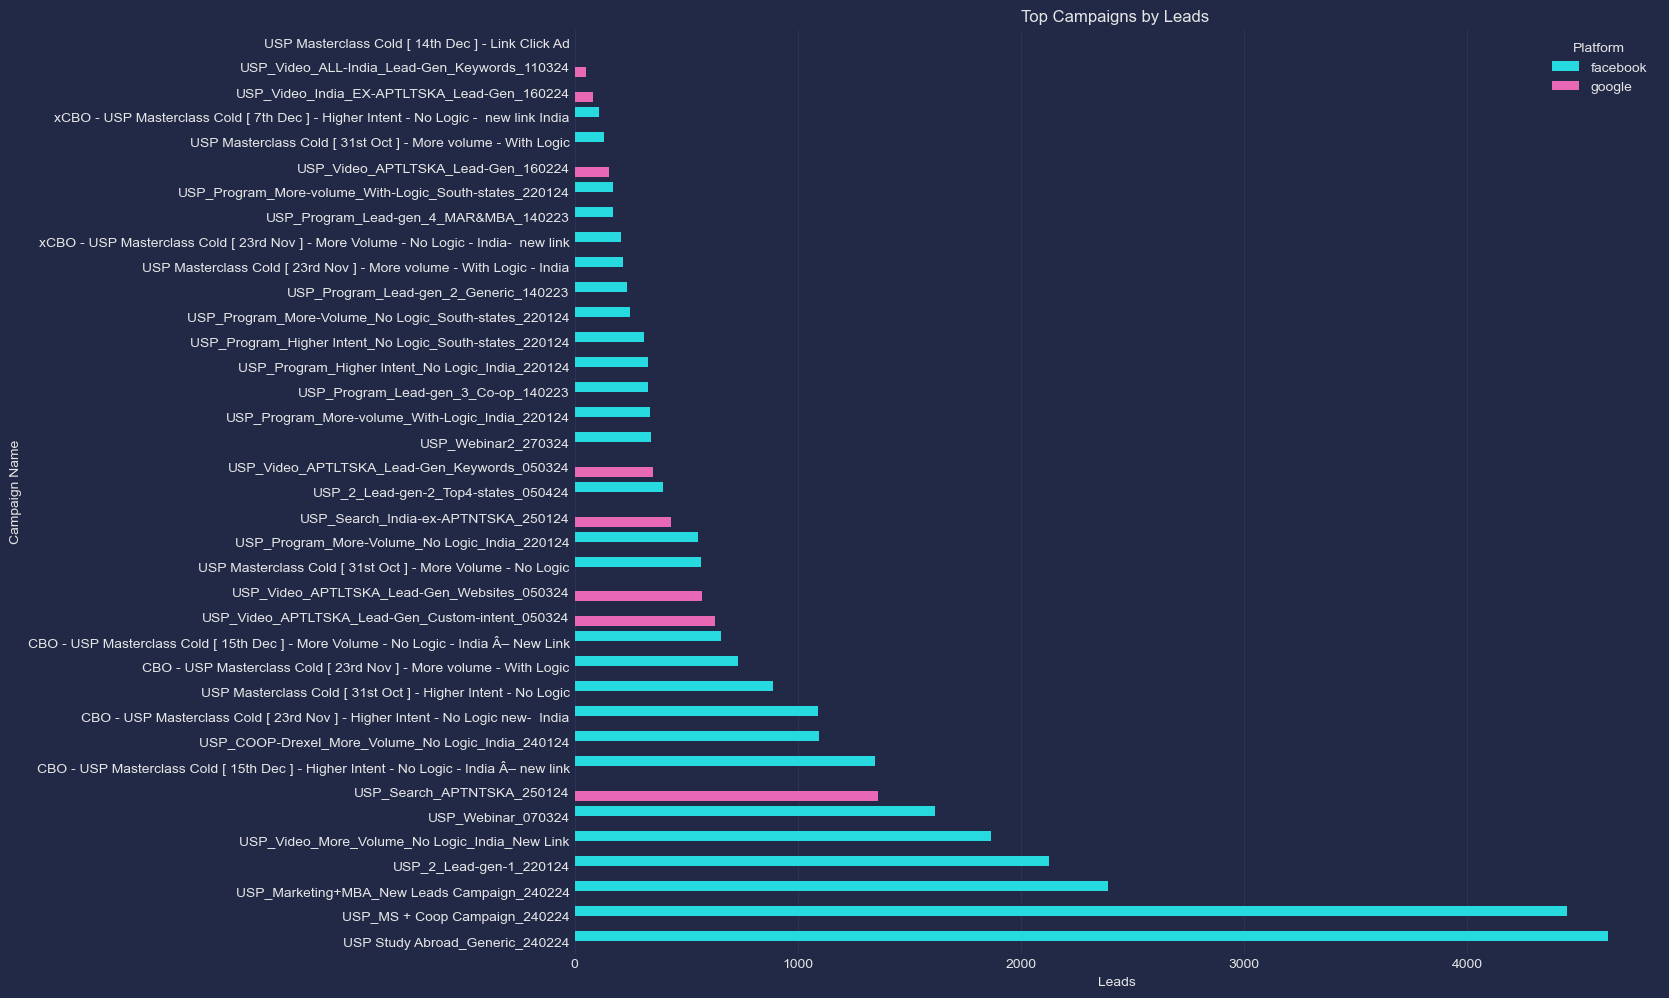

In [10]:
plt.figure(figsize=(14, 12))
sns.barplot(data=df_cp, x='leads', y='campaign_name', hue='platform')
plt.title('Top Campaigns by Leads ')
plt.xlabel('Leads')
plt.ylabel('Campaign Name')
plt.legend(title='Platform')
plt.show()

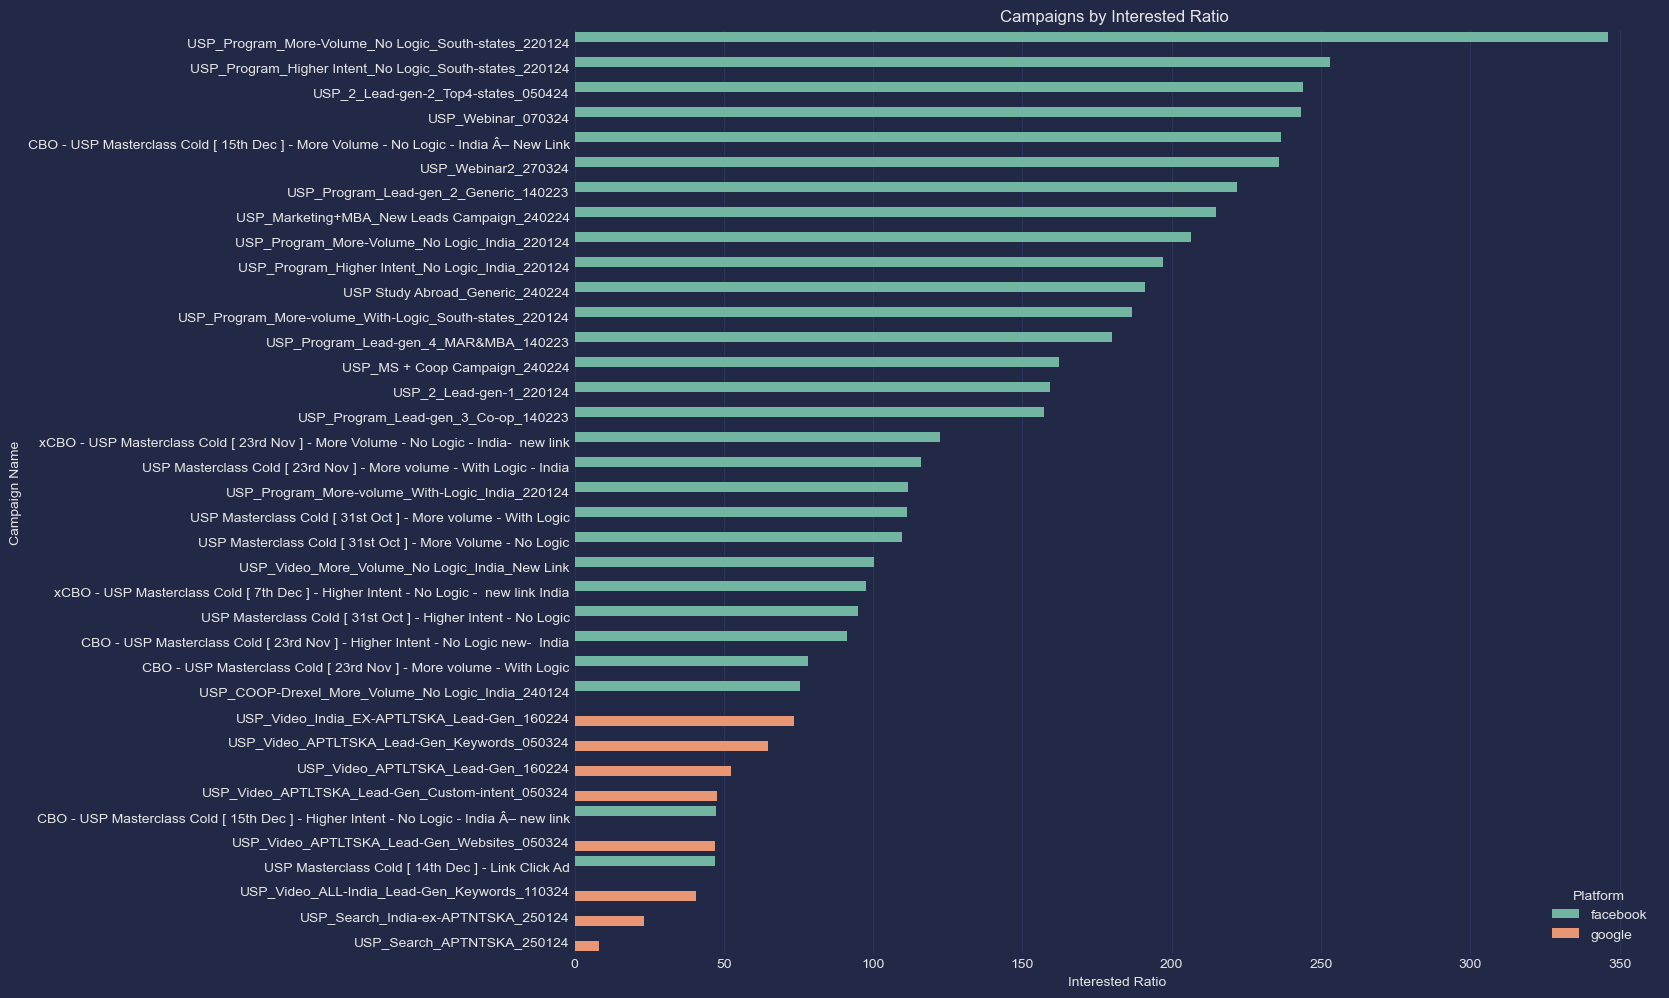

In [11]:
df_int = df_cp[['impressions', 'clicks', 'campaign_name', 'platform']].copy()
df_int.loc[:, 'interested'] = df_int['impressions'] / df_int['clicks']
df_int.sort_values(by='interested',ascending=False,inplace=True)
plt.figure(figsize=(14, 12))
sns.barplot(data=df_int, y='campaign_name', x='interested', hue='platform', palette='Set2')
plt.title('Campaigns by Interested Ratio ')
plt.xlabel('Interested Ratio')
plt.ylabel('Campaign Name')
plt.legend(title='Platform')
plt.show()